# **Submitted By: Capstone Group 1 - AIML MAY Group - 3**

##Project: AIML Online Capstone - Pneumonia Detection Challenge

### OBJECTIVE
To build a pneumonia detection system, to locate the position of inflammation in an image.

### **Pneumonia detection using Mask RCNN model**

### 1.1 Installing all required modules and libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/AIML/Capstone\ Project/

/content/drive/MyDrive/AIML/Capstone Project


In [3]:
!pip install tqdm
!pip install pydicom
!pip install -U albumentations

     |████████████████████████████████| 2.0 MB 5.4 MB/s 
     |████████████████████████████████| 102 kB 5.3 MB/s 
     |████████████████████████████████| 47.8 MB 64 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [4]:
#!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip uninstall -y tensorflow-probability
!pip uninstall -y kapre

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
Found existing installation: tensorflow-probability 0.16.0
Uninstalling tensorflow-probability-0.16.0:
  Successfully uninstalled tensorflow-probability-0.16.0
Found existing installation: kapre 0.3.7
Uninstalling kapre-0.3.7:
  Successfully uninstalled kapre-0.3.7


In [5]:
!pip install h5py==2.10.0
!pip install tensorflow==1.15
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.1.6

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 3.8 MB 39.3 MB/s 
     |████████████████████████████████| 503 kB 44.9 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2dcae6ccd3cf0031c7588e1a6ba6829f6cc235f8bf7786022ebbe27a6d95fdc0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 

# Adding imports for misc and data prep
import os
#import cv2
import pydicom #For displaying dcm images

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

In [7]:
print('Tensorflow version:', tf.__version__)
print('Keras version:', keras.__version__)

Tensorflow version: 1.15.0
Keras version: 2.2.4-tf


In [8]:
# Initialize the random number generator
import random

np.random.seed(1)
random.seed(1)
#tf.random.set_seed(1)

In [9]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [10]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 16.4 MB/s 


In [11]:
from glob import glob
import time
import math
import fnmatch
import sys

from zipfile import ZipFile
from tqdm import tqdm_notebook

import cv2

import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import pydicom


from sklearn.model_selection import train_test_split

# NN Core imports
from tensorflow import keras
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPool2D
from tensorflow.keras.utils import to_categorical


In [ ]:
# Lets have a look at the dir structure
import os
for dirname, _, _ in os.walk('./'):
  
    print(dirname)

./
./rsna-pneumonia-detection-challenge
./rsna-pneumonia-detection-challenge/stage_2_test_images
./Mask_RCNN
./Mask_RCNN/.git
./Mask_RCNN/.git/info
./Mask_RCNN/.git/branches
./Mask_RCNN/.git/hooks
./Mask_RCNN/.git/refs
./Mask_RCNN/.git/refs/heads
./Mask_RCNN/.git/refs/tags
./Mask_RCNN/.git/refs/remotes
./Mask_RCNN/.git/refs/remotes/origin
./Mask_RCNN/.git/objects
./Mask_RCNN/.git/objects/pack
./Mask_RCNN/.git/objects/info
./Mask_RCNN/.git/logs
./Mask_RCNN/.git/logs/refs
./Mask_RCNN/.git/logs/refs/remotes
./Mask_RCNN/.git/logs/refs/remotes/origin
./Mask_RCNN/.git/logs/refs/heads
./Mask_RCNN/assets
./Mask_RCNN/images
./Mask_RCNN/mrcnn
./Mask_RCNN/mrcnn/__pycache__
./Mask_RCNN/samples
./Mask_RCNN/samples/balloon
./Mask_RCNN/samples/coco
./Mask_RCNN/samples/nucleus
./Mask_RCNN/samples/shapes
./Mask_RCNN/mask_rcnn.egg-info
./Mask_RCNN/build
./Mask_RCNN/build/lib
./Mask_RCNN/build/lib/mrcnn
./Mask_RCNN/build/bdist.linux-x86_64
./Mask_RCNN/dist
./mask_rcnn20220430T1809
./mask_rcnn.egg-info
./

### 1.2 Importing and Visualizing the datasets

In [12]:
input_path = "./rsna-pneumonia-detection-challenge/"

train_img_path = input_path + 'stage_2_train_images/'
test_img_path = input_path + 'stage_2_test_images/'

# Contains information on the bounding box for each patient id
bounding_box = input_path + 'stage_2_train_labels.csv' 

# Contains detailed class saying whether data refers to Normal, Pneumonia or any other ailments
detailed_class_info = input_path + 'stage_2_detailed_class_info.csv'

# Contains the target data for which we need to train the images
sample_submission = input_path + 'stage_2_sample_submission.csv'

In [13]:
bounding_box_df = pd.read_csv(bounding_box)
detailed_class_info_df = pd.read_csv(detailed_class_info)

In [14]:
bounding_box_df.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [15]:
detailed_class_info_df.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [16]:
print ("Shape of bounding_box dataframe is :", bounding_box_df.shape)
print ("Shape of detaile call info dataframe is :", detailed_class_info_df.shape)

Shape of bounding_box dataframe is : (30227, 6)
Shape of detaile call info dataframe is : (30227, 2)


Merge bounding_box_df and etailed_class_info_df dataframe

In [17]:
train_data_df = pd.concat([bounding_box_df, detailed_class_info_df['class']], axis = 1)

In [18]:
print("Shape after merging the dataframes (train_data_df) :", train_data_df.shape)

Shape after merging the dataframes (train_data_df) : (30227, 7)


In [19]:
train_data_df.head(10)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity


In [20]:
def update_dataset(path, df1):
  patient_id = []
  label_id = []
  bbox_id = []

  for name, group in df1.groupby(['patientId', 'Target']):
    patient_id.append(path+group['patientId'].tolist()[0]+'.dcm')
    label_id.append(group['Target'].tolist()[0])

    if group['Target'].tolist()[0] == 1:
      ibbox=[]
      for row in group.iterrows():
        ibbox.append([row[1]['x'], row[1]['y'], row[1]['width'], row[1]['height']])
      bbox_id.append(ibbox)
    else:
      bbox_id.append([])

  df = pd.DataFrame({'patientId' : patient_id, 'boundingBox': bbox_id, 'label': label_id})
  return df    


In [21]:
df_updated = update_dataset(train_img_path, bounding_box_df)
print('Shape of updated dataframe is :', df_updated.shape)
df_updated.head(10)

Shape of updated dataframe is : (26684, 3)


,patientId,boundingBox,label
0,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
1,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
2,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[316.0, 318.0, 170.0, 478.0], [660.0, 375.0, ...",1
3,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[570.0, 282.0, 269.0, 409.0], [83.0, 227.0, 2...",1
4,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[66.0, 160.0, 373.0, 608.0], [552.0, 164.0, 3...",1
5,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
6,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[198.0, 375.0, 114.0, 206.0]]",1
7,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[575.0, 232.0, 246.0, 528.0], [161.0, 230.0, ...",1
8,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
9,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0


In [22]:
#img_width = 224
#img_height = 224
#img_channels = 3

#img_size = (img_height, img_width)
#batch_size = 64

label_encode = {0: 'normal', 1:'lung opacity'}

In [23]:
def load_image_plot(row, axis):
  image_path = row.patientId
  image = pydicom.dcmread(image_path).pixel_array
  axis.imshow(image, cmap='gray')
  lbl = label_encode.get(row.label)
  bboxes = row.boundingBox

  for bbox in bboxes:
    x = bbox[0]
    y = bbox[1]
    w = bbox[2]
    h = bbox[3]
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', fill=False)
    axis.add_patch(rect)

  axis.set_title(lbl)

In [24]:
def loadImages(df):
  columns = 4
  rows = 4
  idx = 0
  f, ax = plt.subplots(rows, columns, figsize=(15,15))

  for r in range(rows):
    for c in range(columns):
      axis = ax[r,c]
      load_image_plot(df.iloc[idx], axis)
      idx += 1

  plt.tight_layout()

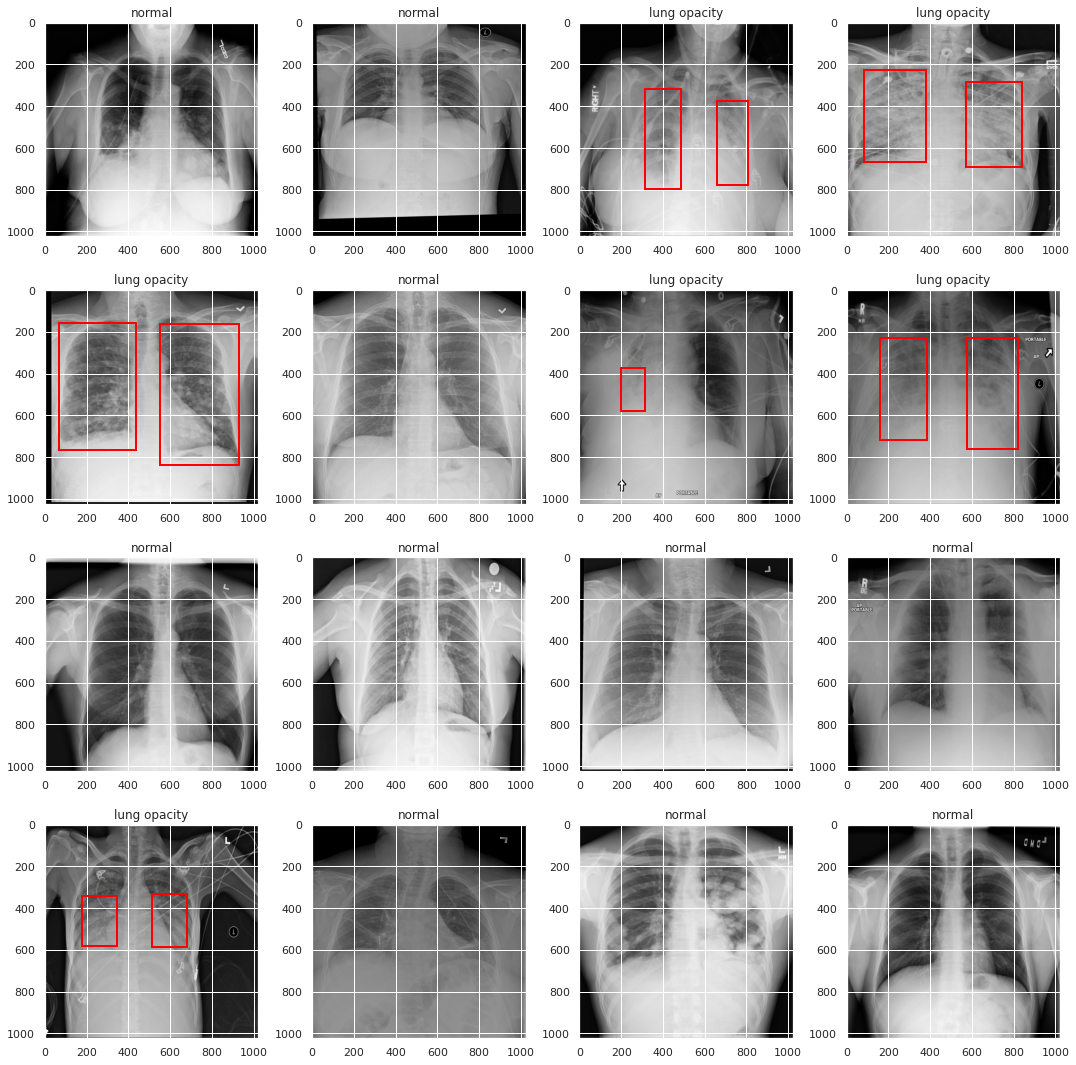

In [ ]:
loadImages(df_updated)

In [25]:
pt70 = math.ceil(df_updated.shape[0] * 0.7)
train_df = df_updated[:pt70]
val_df = df_updated[pt70:]

print(train_df.shape, val_df.shape)

(18679, 3) (8005, 3)


#### Splitting the dataset as test dataset and validation dataset - testing : 80% an validation 20%.

In [26]:
sampleCount = 2000
validation_size = int(0.20 * sampleCount)

#train_sample = train_df[:sampleCount]
#val_sample = val_df[:validation_size]

train_sample = train_df.groupby('label', group_keys=False).apply(lambda x: x.sample(sampleCount, replace=True))
train_sample = train_sample.sample(frac = 1) # Shuffle the dataset

val_sample = val_df.groupby('label', group_keys=False).apply(lambda x: x.sample(validation_size, replace=True))
val_sample = val_sample.sample(frac = 1) # Shuffle the dataset

print('Shape of training dataset :', train_sample.shape)
print('Shape of validation dataset :', val_sample.shape)
print('')

print('Distribution of labels in the train data are ', 
      (train_sample.label.value_counts().values/train_sample.label.value_counts().values.sum())*100)
print('Distribution of labels in the validation data are ', 
      (val_sample.label.value_counts().values/val_sample.label.value_counts().values.sum())*100)

Shape of training dataset : (4000, 3)
Shape of validation dataset : (800, 3)

Distribution of labels in the train data are  [50. 50.]
Distribution of labels in the validation data are  [50. 50.]


In [27]:
train_sample.head(10)

,patientId,boundingBox,label
18205,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[219.0, 566.0, 176.0, 159.0], [681.0, 626.0, ...",1
11901,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
16098,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
6234,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
17819,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[183.0, 553.0, 246.0, 142.0]]",1
2684,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[650.0, 797.0, 147.0, 119.0], [261.0, 711.0, ...",1
11460,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
14675,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[158.0, 128.0, 301.0, 371.0], [552.0, 308.0, ...",1
18303,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[200.0, 203.0, 230.0, 591.0], [585.0, 211.0, ...",1
422,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[157.0, 10.0, 284.0, 759.0], [490.0, 24.0, 31...",1


In [28]:
val_sample.head(10)

,patientId,boundingBox,label
20328,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
18915,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[262.0, 303.0, 288.0, 557.0], [707.0, 278.0, ...",1
26273,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
22938,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
21426,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
23710,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
23377,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
25148,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0
21689,./rsna-pneumonia-detection-challenge/stage_2_t...,"[[186.0, 293.0, 286.0, 403.0]]",1
26047,./rsna-pneumonia-detection-challenge/stage_2_t...,[],0


### 2. Mask-RCNN Model

In [29]:
def iou_loss(y_true, y_pred):
  y_true = tf.reshape(y_true, [-1])
  y_pred = tf.reshape(y_pred, [-1])
  intersection = tf.reduce_sum(float(y_true) * float(y_pred))
  score = (intersection + 1.) / (tf.reduce_sum(float(y_true)) + 
                                 tf.reduce_sum(float(y_pred)) - 
                                 intersection + 1.)
  return 1 - score

def iou_bce_loss(y_true, y_pred):
  return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)
  
def mean_iou(y_true, y_pred):
  y_pred = tf.round(y_pred)
  intersect = tf.reduce_sum(float(y_true) * float(y_pred), axis=[1])
  union = tf.reduce_sum(float(y_true), axis=[1]) + tf.reduce_sum(float(y_pred), axis=[1])
  smooth = tf.ones(tf.shape(intersect))
  return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))
  

### Importing Mask-RCNN repository from matterport github.

In [30]:
!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('Mask_RCNN')

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [31]:
!pip install -r requirements.txt
!python setup.py install

     |████████████████████████████████| 297 kB 5.2 MB/s 
     |████████████████████████████████| 154 kB 50.4 MB/s 
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.tx

In [32]:
!ls -lh mask_rcnn_coco.h5

-rw------- 1 root root 246M Apr 24 07:19 mask_rcnn_coco.h5


In [33]:
workingDir = '/content/drive/MyDrive/AIML/Capstone Project'
mask_rcnn_dir = os.path.join(workingDir+"Mask_RCNN")
sys.path.append(mask_rcnn_dir)

COCO_weights_path = os.path.join(mask_rcnn_dir,"mask_rcnn_coco.h5")

default_logs_dir = os.path.join(workingDir, "logs")

In [34]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
from mrcnn.visualize import display_instances

Using TensorFlow backend.


### Configuration of detection model

In [35]:
# COnfiguration of Detection model
class DetectorConfig(Config):
  NAME = 'Mask_RCNN' # Name for the detector
  GPU_COUNT = 1
  IMAGES_PER_GPU = 8

  BACKBONE = 'resnet50' #'resnet101' #

  NUM_CLASSES = 2 # a background + 1 pneumonia class

  IMAGE_MIN_DIM = 256
  IMAGE_MAX_DIM = 256

  #RPN_ANCHOR_SCALES = (32, 64, 128, 256)
  TRAIN_ROIS_PER_IMAGE = 32
  MAX_GT_INSTANCES = 3
  DETECTION_MAX_INSTANCES = 5
  DETECTION_MIN_CONFIDENCE = 0.9
  DETECTION_NMS_THRESHOLD = 0.1

  STEPS_PER_EPOCH = 50

config = DetectorConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        5
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.1
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

In [36]:
class Detector_Dataset(utils.Dataset):

  def __init__(self, imagePath, imageBBoxes, orig_height, orig_width):
    super().__init__(self)

    # Add classes
    self.add_class('Pneumonia', 1, 'Lung Opacity')

    # Add images
    for i, fp in enumerate(imagePath):
      bboxes = imageBBoxes[i]
      self.add_image('Pneumonia', image_id = i, path = fp, annotations=bboxes,
                     orig_height = orig_height, orig_width = orig_width)
      
  def image_reference(self, image_id):
    info = self.image_info[image_id]
    return info['path']

  def load_image(self, image_id):
    info = self.image_info[image_id]
    fp = info['path']
    ds = pydicom.read_file(fp)
    image = ds.pixel_array
    if len(image.shape) != 3 or image.shape[2] != 3:
      image = np.stack((image,) * 3, -1)
    return image/255.0

  def load_mask(self, image_id):
    info = self.image_info[image_id]
    bboxes = info['annotations']
    count = len(bboxes)

    #global class_ids

    if count == 0:
      mask = np.zeros((info['orig_height'], info['orig_width'],1), dtype=np.uint8)
      class_ids = np.zeros((1,), dtype = np.int32)
    else:
      mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
      class_ids = np.zeros((count,), dtype = np.int32)
      for i, a in enumerate(bboxes):
        #if a['Target'] == 1:
          x = int(a[0])  # 'x'
          y = int(a[1])  # 'y'
          w = int(a[2]) # 'width'
          h = int(a[3]) # 'height'

          mask_instance = mask[:, :, i].copy()
          cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 1, -1)
          mask[:, :, i] = mask_instance
          class_ids[i] = 1

    return mask.astype(np.bool), class_ids.astype(np.int32)        


### Prepare training dataset and validation dataset

In [37]:
# prepare the training dataset

dataset_train = Detector_Dataset(train_sample.patientId.to_list(),
                                  train_sample.boundingBox.to_list(),
                                  1024, 1024)
dataset_train.prepare()

In [38]:
# prepare the validation dataset

dataset_val = Detector_Dataset(val_sample.patientId.to_list(),
                               val_sample.boundingBox.to_list(),
                               1024, 1024)
dataset_val.prepare()

In [144]:
# Load Mask RCNN model
model_maskrcnn = modellib.MaskRCNN(mode='training', config = config, model_dir = workingDir)

### Training the model for all layers.

In [ ]:
# Train Mask - RCNN model
history_maskrcnn_all = model_maskrcnn.train(dataset_train, 
                                        dataset_val,
                                        learning_rate = config.LEARNING_RATE,
                                        epochs = 15,
                                        layers = 'all') 


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/AIML/Capstone Project/mask_rcnn20220503T1754/mask_rcnn_mask_rcnn_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b    

In [106]:
class PredictionConfig(DetectorConfig):
    NUM_CLASSES = 1 + 1
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

prediction_config = PredictionConfig()

### Let's look at the model prediction.

In [98]:
# Recreate the model in inference mode
model_maskrcnn_all_inference = modellib.MaskRCNN(mode='inference', 
                                                 config=prediction_config,
                                                 model_dir=workingDir)

# Load trained weights (fill in path to trained weights here)
mask_rcnn_fitted_weights = '/content/drive/MyDrive/AIML/Capstone Project/mask_rcnn20220501T0803/mask_rcnn_mask_rcnn_0005.h5'
print("Loading weights from ", mask_rcnn_fitted_weights)
model_maskrcnn_all_inference.load_weights(mask_rcnn_fitted_weights, by_name=True)

Loading weights from  /content/drive/MyDrive/AIML/Capstone Project/mask_rcnn20220501T0803/mask_rcnn_mask_rcnn_0005.h5
Re-starting from epoch 5



*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 



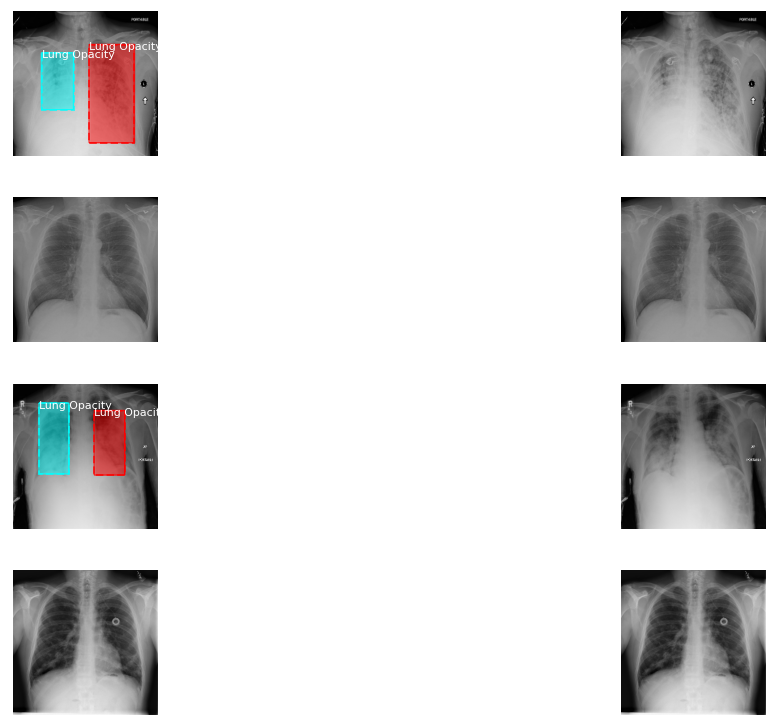

In [143]:
# Show few example of ground truth vs. predictions on the validation dataset
dataset = dataset_train
fig = plt.figure(figsize=(20, 20))

for i in range(4):
    image_id = random.choice(dataset.image_ids)
    #image_id = 50
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, prediction_config, image_id, use_mini_mask=False)
    #print(original_image.shape)
    #print(image_id)
    scaled_image = modellib.mold_image(original_image, prediction_config)
    #print(scaled_image.shape)
    #print(gt_bbox)
    plt.subplot(6, 2, 2*i + 1)
    visualize.display_instances(original_image*255, gt_bbox, gt_mask, gt_class_id, dataset.class_names, ax=fig.axes[-1])
    
    plt.subplot(6, 2, 2*i + 2)
    results = model_maskrcnn_all_inference.detect([original_image*255], verbose = 0)
    #print(results)
    r = results[0]
    visualize.display_instances(original_image*255, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], ax=fig.axes[-1])

### Observation: The fitted model did not able to predict the lung infection i.e. lung opacity.

In [40]:
cd /content/drive/MyDrive/AIML/Capstone\ Project

/content/drive/MyDrive/AIML/Capstone Project


### Let's load the pretrained weights of the model which are traine on COCO dataset. The weights, 'mask_rcnn_coco.h5' are avaiable on github repository. The weights are loaded for the layers which contributes primarily to feature extraction. The outer layers are actually contributes for image detection. Only these layers are trained using given Pneumonia dataset.

In [ ]:
# Load Mask RCNN model for training outer layer
model_maskrcnn_heads = modellib.MaskRCNN(mode='training', config = config, model_dir = workingDir)

In [ ]:
# load weights (mscoco) and exclude the output layers
model_maskrcnn_heads.load_weights('mask_rcnn_coco.h5', by_name=True, 
                                 exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
# train weights (output layers or 'heads')
history_maskrcnn_heads = model_maskrcnn_heads.train(dataset_train,
                                              dataset_val, 
                                              learning_rate=config.LEARNING_RATE, 
                                              epochs=5, 
                                              layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/AIML/Capstone Project/mask_rcnn20220502T1904/mask_rcnn_mask_rcnn_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (Tim

In [41]:
cd /content/drive/MyDrive/AIML/Capstone\ Project

/content/drive/MyDrive/AIML/Capstone Project


### Load the weights which are determine from above fitted procedure.

In [133]:
# Recreate the model in inference mode
model_maskrcnn_heads_inference = modellib.MaskRCNN(mode='inference', 
                                                 config=prediction_config,
                                                 model_dir=workingDir)

# Load trained weights (fill in path to trained weights here)
mask_rcnn_fitted_weights = '/content/drive/MyDrive/AIML/Capstone Project/mask_rcnn20220502T1904/mask_rcnn_mask_rcnn_0005.h5'

#mask_rcnn_fitted_weights = '/content/drive/MyDrive/AIML/Capstone Project/mask_rcnn20220502T0017/mask_rcnn_mask_rcnn_0020.h5'

print("Loading weights from ", mask_rcnn_fitted_weights)
model_maskrcnn_heads_inference.load_weights(mask_rcnn_fitted_weights, by_name=True)

Loading weights from  /content/drive/MyDrive/AIML/Capstone Project/mask_rcnn20220502T1904/mask_rcnn_mask_rcnn_0005.h5
Re-starting from epoch 5


In [108]:
cd /content/drive/MyDrive/AIML/Capstone\ Project

/content/drive/MyDrive/AIML/Capstone Project


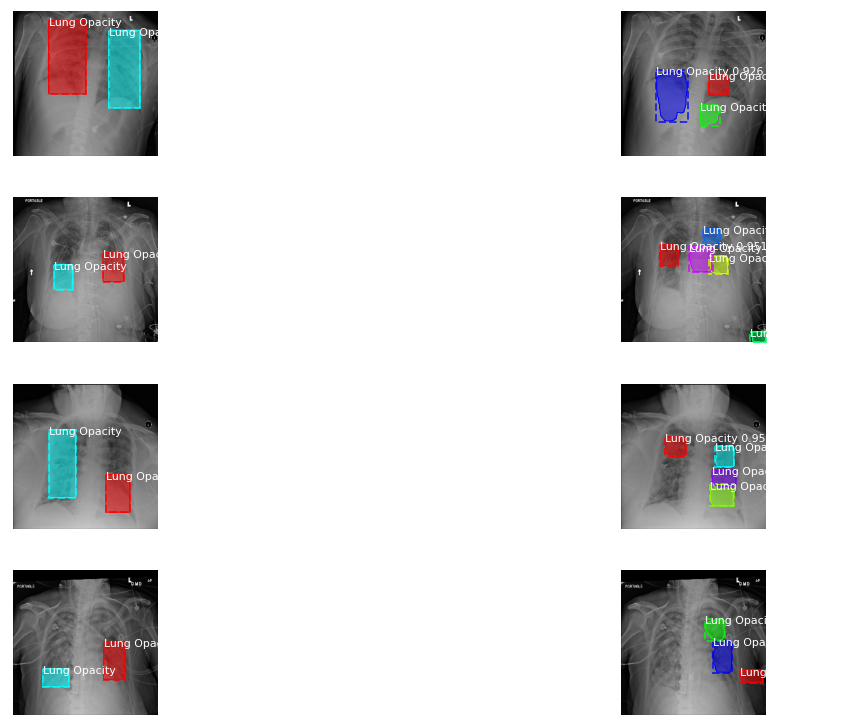

In [134]:
# Show few example of ground truth vs. predictions on the validation dataset
dataset = dataset_val
fig = plt.figure(figsize=(20, 20))

for i in range(4):
    image_id = random.choice(dataset.image_ids)
    #image_id = 50
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, prediction_config, image_id, use_mini_mask=False)
    #print(original_image.shape)
    #print(image_id)
    scaled_image = modellib.mold_image(original_image, prediction_config)
    #print(scaled_image.shape)
    #print(gt_bbox)
    plt.subplot(6, 2, 2*i + 1)
    visualize.display_instances(original_image*255, gt_bbox, gt_mask, gt_class_id, dataset.class_names, ax=fig.axes[-1])
    
    plt.subplot(6, 2, 2*i + 2)
    results = model_maskrcnn_heads_inference.detect([original_image*255], verbose = 0)
    #print(results)
    r = results[0]
    visualize.display_instances(original_image*255, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], ax=fig.axes[-1])

### Observation: This model could able to at least predict Lung Opacity. The model could able to predict multiple regions including its probability.